In [29]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")
import re
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

In [2]:
df_original = pd.read_csv('Crop_recommendation.csv')

In [3]:
df_original.shape

(2200, 8)

In [4]:
df_original.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df_original.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
df_original.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
 df_original=df_original.dropna()
# Eliminación de registros duplicados.
 df_original=df_original.drop_duplicates()

In [9]:
df_original.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df_original.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
df_original['label'].describe()

count     2200
unique      22
top       rice
freq       100
Name: label, dtype: object

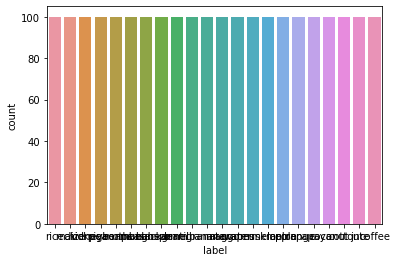

In [13]:
ax = sns.countplot(x='label', data=df_original)

In [20]:
number_cols=['temperature','humidity','ph','label']
df_listo = df_original[number_cols]

In [21]:
df_listo.head(5)

,temperature,humidity,ph,label
0,20.879744,82.002744,6.502985,rice
1,21.770462,80.319644,7.038096,rice
2,23.004459,82.320763,7.840207,rice
3,26.491096,80.158363,6.980401,rice
4,20.130175,81.604873,7.628473,rice


In [22]:
# Se selecciona la variable objetivo, en este caso "Popularity_label".
Y = df_listo['label']
# Del conjunto de datos se elimina la variable "Popularity_label"
X = df_listo.drop(['label'], axis=1)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [15]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

In [16]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [25]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 20],
                         'min_samples_split': [2, 3, 4, 5]})

In [26]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}

In [31]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.84
Exactitud sobre test: 0.73


In [32]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

       apple       0.95      1.00      0.97        18
      banana       0.48      0.67      0.56        18
   blackgram       0.78      0.82      0.80        22
    chickpea       0.92      1.00      0.96        23
     coconut       0.87      0.87      0.87        15
      coffee       0.50      0.53      0.51        17
      cotton       0.54      0.44      0.48        16
      grapes       0.82      0.50      0.62        18
        jute       0.50      0.48      0.49        21
 kidneybeans       1.00      0.90      0.95        20
      lentil       0.50      0.53      0.51        17
       maize       0.70      0.78      0.74        18
       mango       0.77      0.95      0.85        21
   mothbeans       0.71      0.48      0.57        25
    mungbean       0.92      0.65      0.76        17
   muskmelon       0.85      1.00      0.92        23
      orange       1.00      0.65      0.79        23
      papaya       0.72    

In [47]:
# Decalra el pipeline
selected_cols = ['temperature','humidity','ph']
pipeline = Pipeline(steps=[
    ('data_preprocessing', ColumnTransformer([
        ("selector", "passthrough", selected_cols)
    ], remainder="drop")),
    ('data_scaling', StandardScaler()),
    ('num_imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('model',DecisionTreeClassifier(random_state=0,criterion='gini',max_depth=10,min_samples_split=5)),
    ])

In [48]:
pipeline = pipeline.fit(X_train, Y_train)

In [49]:
filename = r'C:\Users\peluc\workspace\Notebooks\BI\PMC\pipeline.joblib'
# Se guarda
dump(pipeline, filename)

['C:\\Users\\peluc\\workspace\\Notebooks\\BI\\PMC\\pipeline.joblib']

In [50]:
# Se lee
p2 = load(filename)
p2

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['temperature', 'humidity',
                                                   'ph'])])),
                ('data_scaling', StandardScaler()),
                ('num_imputer', SimpleImputer()),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=5,
                                        random_state=0))])

In [51]:
p2.score(X_test,Y_test)

0.7340909090909091